In [17]:
import os
import keras
import keras.datasets.imdb as imdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import fidle

In [4]:
vocab_size = 10000 #On prend les 10000 token les plus frequents de mon dictionnaire
hide_most_frequently = 0

epochs    = 10
batch_size  = 512 #Nombre de token à prendre en compte avant de changer les paramètres du modèle

## Visualisation du One hot encoding

In [5]:
sentence = "I've never seen a movie like this before"

dictionary  = {"a":0, "before":1, "fantastic":2, "i've":3, "is":4, "like":5, "movie":6, "never":7, "seen":8, "this":9}

In [ ]:
sentence_words = sentence.lower().split() #On rend tout en minuscule et on éclate la phrase en une liste de mot

sentence_vect = [dictionary[w] for w in sentence_words] #Encodage numéric

print('Words sentence are         : ', sentence_words)
print('Our vectorized sentence is : ', sentence_vect)

Words sentence are         :  ["i've", 'never', 'seen', 'a', 'movie', 'like', 'this', 'before']
Our vectorized sentence is :  [3, 7, 8, 0, 6, 5, 9, 1]


### We one-hot encode our vectorized sentence as a tensor

In [7]:
# ---- We get a (sentence length x vector size) matrix of zeros
#
onehot = np.zeros( (10,8) )

# ---- We set some 1 for each word
#
for i,w in enumerate(sentence_vect):
    onehot[w,i]=1

# --- Show it
#
print('In a basic way :\n\n', onehot, '\n\nWith a pandas wiew :\n')
data={ f'{sentence_words[i]:.^10}':onehot[:,i] for i,w in enumerate(sentence_vect) }
df=pd.DataFrame(data)
df.index=dictionary.keys()
# --- Pandas Warning 
# 
df.style.format('{:1.0f}').highlight_max(axis=0).set_properties(**{'text-align': 'center'})

In a basic way :

 [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]] 

With a pandas wiew :



,...i've...,..never...,...seen...,....a.....,..movie...,...like...,...this...,..before..
a,0,0,0,1,0,0,0,0
before,0,0,0,0,0,0,0,1
fantastic,0,0,0,0,0,0,0,0
i've,1,0,0,0,0,0,0,0
is,0,0,0,0,0,0,0,0
like,0,0,0,0,0,1,0,0
movie,0,0,0,0,1,0,0,0
never,0,1,0,0,0,0,0,0
seen,0,0,1,0,0,0,0,0
this,0,0,0,0,0,0,1,0


On voit que "I've" se trouve à la position 3 dans le dictionnaire donc il es codé par le premier vecteur colonne.

# Visualisation du dataset

In [ ]:
# ----- Retrieve x,y
#
start_char = 1      # Start of a sequence (padding is 0)
oov_char   = 2      # Out-of-vocabulary
index_from = 3      # First word id

# y = 0  ou 1 pour dire si le commentaire est négatig ou positif

(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words  = vocab_size, 
                                                       skip_top   = hide_most_frequently,
                                                       start_char = start_char, 
                                                       oov_char   = oov_char, 
                                                       index_from = index_from)

# ---- About
#
print("Max(x_train,x_test)  : ", fidle.utils.rmax([x_train,x_test]) )
print("Min(x_train,x_test)  : ", fidle.utils.rmin([x_train,x_test]) )
print("Len(x_train)         : ", len(x_train))
print("Len(x_test)          : ", len(x_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 39s 2us/step
Max(x_train,x_test)  :  9999
Min(x_train,x_test)  :  1
Len(x_train)         :  25000
Len(x_test)          :  25000


In [ ]:
print('\nReview example (x_train[12]) :\n\n',x_train[12])#On affiche la phrase 12 avec les numéro des token correspondant à leur numéro dans le dictionnaire
print('\nOpinions (y_train) :\n\n',y_train)


Review example (x_train[12]) :

 [1, 13, 119, 954, 189, 1554, 13, 92, 459, 48, 4, 116, 9, 1492, 2291, 42, 726, 4, 1939, 168, 2031, 13, 423, 14, 20, 549, 18, 4, 2, 547, 32, 4, 96, 39, 4, 454, 7, 4, 22, 8, 4, 55, 130, 168, 13, 92, 359, 6, 158, 1511, 2, 42, 6, 1913, 19, 194, 4455, 4121, 6, 114, 8, 72, 21, 465, 9667, 304, 4, 51, 9, 14, 20, 44, 155, 8, 6, 226, 162, 616, 651, 51, 9, 14, 20, 44, 10, 10, 14, 218, 4843, 629, 42, 3017, 21, 48, 25, 28, 35, 534, 5, 6, 320, 8, 516, 5, 42, 25, 181, 8, 130, 56, 547, 3571, 5, 1471, 851, 14, 2286]

Opinions (y_train) :

 [1 0 0 ... 0 1 0]


## Téléchargement du dictionnaire

In [10]:
# ---- Retrieve dictionary {word:index}, and encode it in ascii
#
word_index = imdb.get_word_index()

# ---- Shift the dictionary from <index_from>
#
word_index = {w:(i+index_from) for w,i in word_index.items()}

# ---- Add <pad>, <start> and <unknown> tags
#
word_index.update( {'<pad>':0, '<start>':1, '<unknown>':2, '<undef>':3,} )

# ---- Create a reverse dictionary : {index:word}
#
index_word = {index:word for word,index in word_index.items()} 

# ---- About dictionary
#
print('\nDictionary size     : ', len(word_index))
print('\nSmall extract :\n')
for k in range(440,455):print(f'    {k:2d} : {index_word[k]}' )

# ---- Add a nice function to transpose :
#
def dataset2text(review):
    return ' '.join([index_word.get(i, '?') for i in review])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 8s 5us/step

Dictionary size     :  88588

Small extract :

    440 : hope
    441 : entertaining
    442 : she's
    443 : mr
    444 : overall
    445 : evil
    446 : called
    447 : loved
    448 : based
    449 : oh
    450 : several
    451 : fans
    452 : mother
    453 : drama
    454 : beginning


In [11]:
fidle.utils.subtitle('Review example :')
print(x_train[12])
fidle.utils.subtitle('After translation :')
print(dataset2text(x_train[12]))

<br>**Review example :**

[1, 13, 119, 954, 189, 1554, 13, 92, 459, 48, 4, 116, 9, 1492, 2291, 42, 726, 4, 1939, 168, 2031, 13, 423, 14, 20, 549, 18, 4, 2, 547, 32, 4, 96, 39, 4, 454, 7, 4, 22, 8, 4, 55, 130, 168, 13, 92, 359, 6, 158, 1511, 2, 42, 6, 1913, 19, 194, 4455, 4121, 6, 114, 8, 72, 21, 465, 9667, 304, 4, 51, 9, 14, 20, 44, 155, 8, 6, 226, 162, 616, 651, 51, 9, 14, 20, 44, 10, 10, 14, 218, 4843, 629, 42, 3017, 21, 48, 25, 28, 35, 534, 5, 6, 320, 8, 516, 5, 42, 25, 181, 8, 130, 56, 547, 3571, 5, 1471, 851, 14, 2286]


<br>**After translation :**

<start> i love cheesy horror flicks i don't care if the acting is sub par or whether the monsters look corny i liked this movie except for the <unknown> feeling all the way from the beginning of the film to the very end look i don't need a 10 page <unknown> or a sign with big letters explaining a plot to me but dark floors takes the what is this movie about thing to a whole new annoying level what is this movie about br br this isn't exceptionally scary or thrilling but if you have an hour and a half to kill and or you want to end up feeling frustrated and confused rent this winner


# Statistic Descriptive

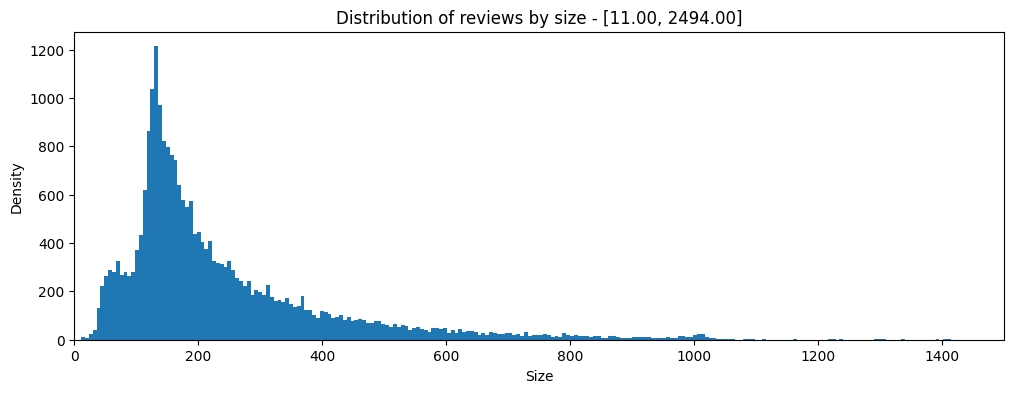

In [ ]:
sizes=[len(i) for i in x_train]
plt.figure(figsize=(12,4))
plt.hist(sizes, bins=400)
plt.gca().set(title='Distribution of reviews by size - [{:5.2f}, {:5.2f}]'.format(min(sizes),max(sizes)), 
              xlabel='Size', ylabel='Density', xlim=[0,1500])
fidle.scrawler.save_fig('01-stats-sizes')
plt.show()

On remarque un très grande variance de la taille des commentaires. Or nos réseau de neuronne prennes des phrases de meme taille

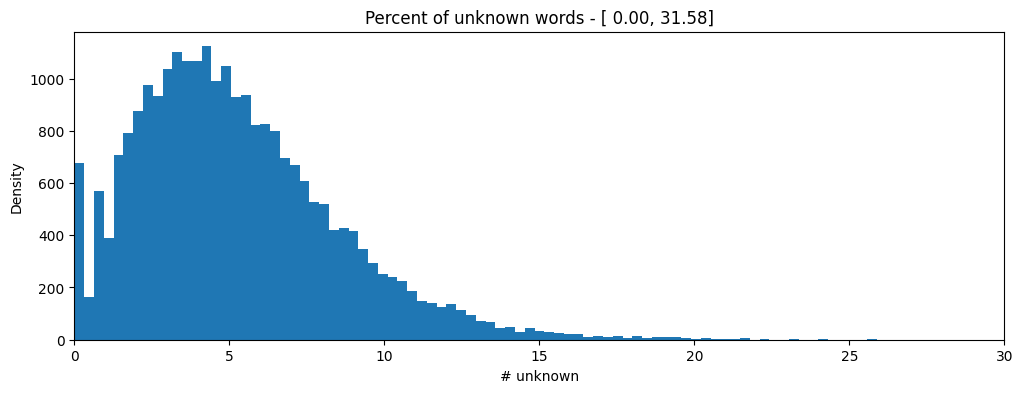

In [13]:
unk=[ 100*(s.count(oov_char)/len(s)) for s in x_train]
plt.figure(figsize=(12,4))
plt.hist(unk, bins=100)
plt.gca().set(title='Percent of unknown words - [{:5.2f}, {:5.2f}]'.format(min(unk),max(unk)), 
              xlabel='# unknown', ylabel='Density', xlim=[0,30])
fidle.scrawler.save_fig('02-stats-unknown')
plt.show()

On remarque qu'on a entre 0 et 32% de mot inconnu 

### Encodage de nos phrases pas par mot ce qui nous fait perdre de l'information sur l'ordre des mots dans les phrases

#### Fonction de one-hot encoder de phrase

In [ ]:
"""
je parcour la phrase si je trouve un token appartenant au dictionnaire je met 1 sinon 0

"""
def one_hot_encoder(x, vector_size=10000):

    # ---- Set all to 0
    #
    x_encoded = np.zeros((len(x), vector_size))
    
    # ---- For each sentence
    #
    for i,sentence in enumerate(x):
        for word in sentence:
            x_encoded[i, word] = 1.

    return x_encoded

#### Encoding

In [15]:
x_train = one_hot_encoder(x_train, vector_size=vocab_size)
x_test  = one_hot_encoder(x_test,  vector_size=vocab_size)

print("To have a look, x_train[12] became :", x_train[12] )

To have a look, x_train[12] became : [0. 1. 1. ... 0. 0. 0.]


## Création du modèle

In [16]:
model = keras.Sequential()

model.add(keras.layers.Input( shape=(vocab_size,) ))
model.add(keras.layers.Dense( 32, activation='relu'))
model.add(keras.layers.Dense( 32, activation='relu'))
model.add(keras.layers.Dense( 1,  activation='sigmoid'))
    
model.compile(optimizer = 'rmsprop',
                  loss      = 'binary_crossentropy',
                  metrics   = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │       320,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,121 (1.22 MB)

 Trainable params: 321,121 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

## Add callback

In [19]:
os.makedirs('/models',   mode=0o750, exist_ok=True)
save_dir = '/models/best_model.keras'

savemodel_callback = keras.callbacks.ModelCheckpoint( filepath=save_dir, monitor='val_accuracy', mode='max', save_best_only=True)

#### Entrainement

In [21]:
%%time

history = model.fit(x_train,
                    y_train,
                    epochs          = epochs,
                    batch_size      = batch_size,
                    validation_data = (x_test, y_test),
                    verbose         = 1,
                    callbacks       = [savemodel_callback])

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step - accuracy: 0.7078 - loss: 0.5593 - val_accuracy: 0.8778 - val_loss: 0.3307
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 715ms/step - accuracy: 0.9018 - loss: 0.2758 - val_accuracy: 0.8504 - val_loss: 0.3578
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9237 - loss: 0.2097 - val_accuracy: 0.8868 - val_loss: 0.2832
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9374 - loss: 0.1753 - val_accuracy: 0.8738 - val_loss: 0.3208
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9475 - loss: 0.1469 - val_accuracy: 0.8704 - val_loss: 0.3507
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9581 - loss: 0.1282 - val_accuracy: 0.8761 - val_loss: 0.3277
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9623 - loss: 0.1146 - val_accuracy: 0.8743 - val_loss: 0.3502
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9654 - loss: 0.1001 - val_accuracy: 0.8626 - v

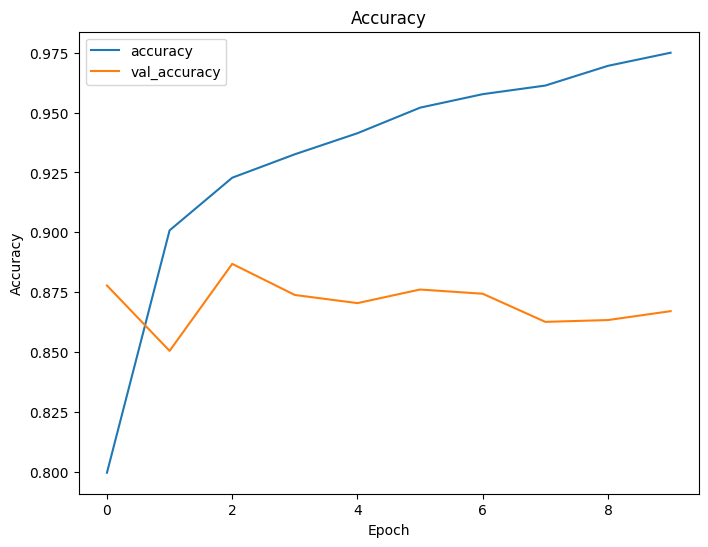

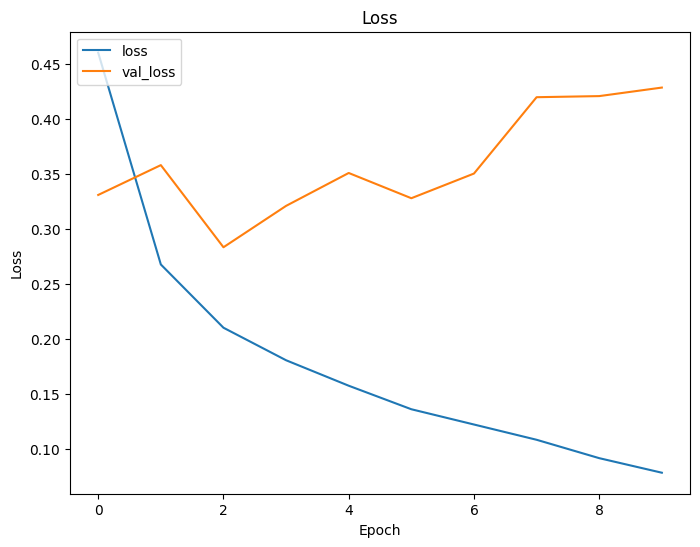

In [22]:
fidle.scrawler.history(history, save_as='02-history')

## Montage et evaluation du best model



Model evaluation :

    x_test / loss      : 0.2832
    x_test / accuracy  : 0.8868


#### Accuracy donut is :

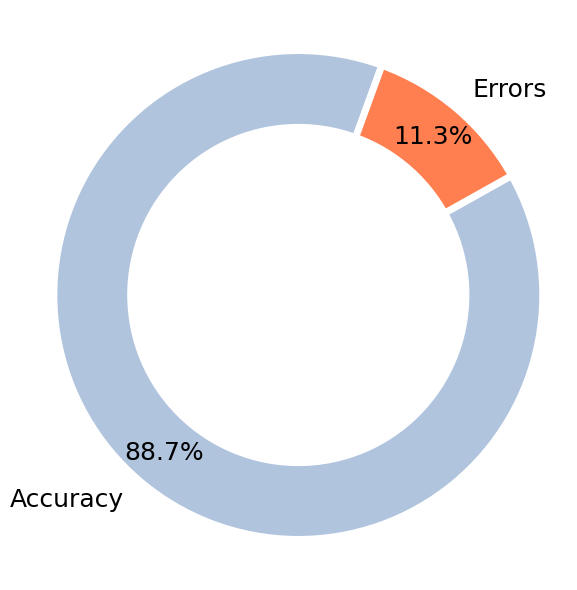

782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 11ms/step


#### Confusion matrix is :

,0,1
0,0.86,0.14
1,0.09,0.91


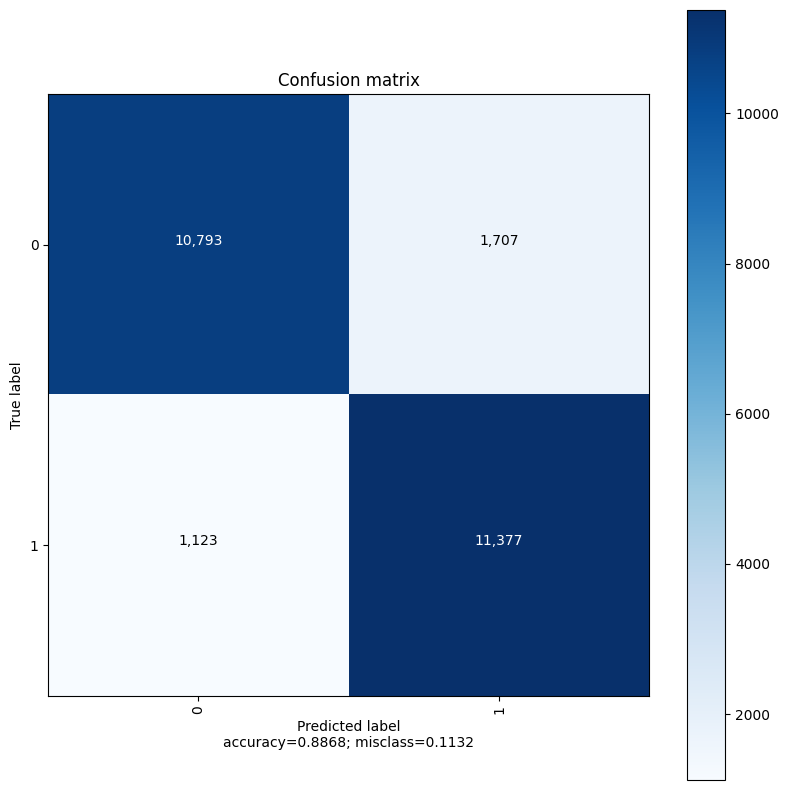

In [25]:
model = keras.models.load_model('/models/best_model.keras')

# ---- Evaluate
score  = model.evaluate(x_test, y_test, verbose=0)

print('\n\nModel evaluation :\n')
print('    x_test / loss      : {:5.4f}'.format(score[0]))
print('    x_test / accuracy  : {:5.4f}'.format(score[1]))

values=[score[1], 1-score[1]]
fidle.scrawler.donut(values,["Accuracy","Errors"], title="#### Accuracy donut is :", save_as='03-donut')

# ---- Confusion matrix

y_sigmoid = model.predict(x_test, verbose=1)

y_pred = y_sigmoid.copy()
y_pred[ y_sigmoid< 0.5 ] = 0
y_pred[ y_sigmoid>=0.5 ] = 1    

fidle.scrawler.confusion_matrix_txt(y_test,y_pred,labels=range(2))
fidle.scrawler.confusion_matrix(y_test,y_pred,range(2), figsize=(8, 8),normalize=False, save_as='04-confusion-matrix')